# Question 1

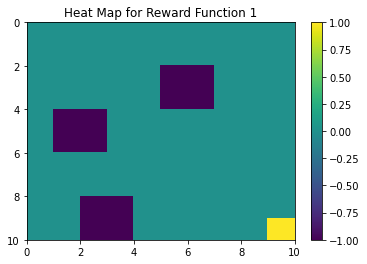

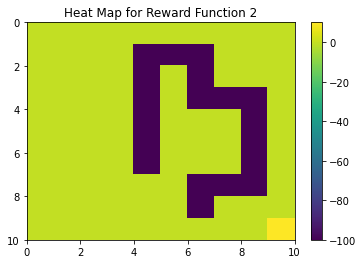

In [0]:
import matplotlib.pyplot as plt
import numpy as np

reward_1 = np.zeros((10,10))
reward_1[2:4,5:7] = -1
reward_1[4:6,1:3] = -1
reward_1[8,2:4] = -1
reward_1[9,2:4] = -1
reward_1[9,9] = 1
plt.pcolor(reward_1)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Reward Function 1")
plt.show()

reward_2 = np.zeros((10,10))
reward_2[1:7,4] = -100
reward_2[1,5:7] = -100
reward_2[2:4,6] = -100
reward_2[3,7:9] = -100
reward_2[4:8,8] = -100
reward_2[7,6:8] = -100
reward_2[8,6] = -100
reward_2[9,9] = 10
plt.pcolor(reward_2)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Reward Function 2")
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
class Maze:
    def __init__(self, w, gamma, rewards):
        self.size = rewards.shape[0]
        self.actions = [-self.size, -1, self.size, 1]
        self.reward = np.transpose(rewards)
        self.flattenR = self.reward.flatten()
        self.w = w
        self.gamma = gamma
        self.values = np.zeros((self.size, self.size))
        self.flattenV = self.values.flatten()
        self.Policy = np.zeros((self.size, self.size), dtype=np.int8)

    def trans_prob(self, curr, Pnext, action):
        curr_state = self.judge_state(curr)
        if curr_state == 0:
            return self.inner_prob(curr, Pnext, action)
        if curr_state == 1:
            return self.edge_prob(curr, Pnext, action)
        return self.corner_prob(curr, Pnext, action)

    def judge_state(self, curr):
        corner = [0, self.size - 1, self.size * (self.size - 1), self.size ** 2 - 1]
        if curr in corner:
            return 2
        row = curr % self.size
        col = curr // self.size
        if row == 0 or row == (self.size - 1):
            return 1
        if col == 0 or col == (self.size - 1):
            return 1
        return 0

    def outrange(self, curr, action):
        row = curr % self.size
        col = curr // self.size
        if action < 0:
            delta_row = -(-action % self.size)
            delta_col = -(-action // self.size)
        else:
            delta_row = action % self.size
            delta_col = action // self.size
        new_row = row + delta_row
        new_col = col + delta_col
        if new_row < 0 or new_row >= self.size:
            return 1
        if new_col < 0 or new_col >= self.size:
            return 1
        return 0

    def inner_prob(self, curr, Pnext, action):
        delta = Pnext - curr
        if action == delta:
            return 1 - self.w + self.w / 4
        return self.w / 4

    def edge_prob(self, curr, Pnext, action):
        delta = Pnext - curr
        out = self.outrange(curr, action)
        if out == 1:
            if delta == 0:
                return 1 - self.w + self.w / 4
            return self.w / 4
        else:
            if delta == action:
                return 1 - self.w + self.w / 4
            return self.w / 4

    def corner_prob(self, curr, Pnext, action):
        delta = Pnext - curr
        out = self.outrange(curr, action)
        if out == 1:
            if delta == 0:
                return 1 - self.w / 2
            return self.w / 4
        else:
            if delta == 0:
                return self.w / 2
            if delta == action:
                return 1 - self.w + self.w / 4
            return self.w / 4

    def possible_next_state(self, curr):
        possible_S = []
        flag = 0
        for a in self.actions:
            if self.outrange(curr, a):
                flag = 1
                continue
            possible_S.append(curr + a)

        if flag:
            possible_S.append(curr)

        return possible_S

    def computation_Vs(self, curr):
        possible_S = self.possible_next_state(curr)
        new_V = [0] * len(self.actions)
        for count in range(len(self.actions)):
            V = 0
            a = self.actions[count]
            for i in range(len(possible_S)):
                new_S = possible_S[i]
                V += self.trans_prob(curr, new_S, a) * (self.flattenR[new_S] + self.gamma * self.flattenV[new_S])
            new_V[count] = V
        return new_V

    def determine_policy(self, curr):
        Vs = self.computation_Vs(curr)
        return np.argmax(Vs)

    def calculate_V(self, curr):
        Vs = self.computation_Vs(curr)
        return max(Vs)

    def optimal_policy(self, epsilon):
        while 1:
            delta = 0
            for i in range(len(self.flattenR)):
                v = self.flattenV[i]
                new_V = self.calculate_V(i)
                self.flattenV[i] = new_V
                delta = max(delta, abs(v - new_V))
            if delta <= epsilon:
                break
        for i in range(len(self.flattenR)):
            row = i % self.size
            col = i // self.size
            self.Policy[row, col] = self.determine_policy(i)
        self.values = self.flattenV.reshape((self.size, self.size)).transpose()

    def policy_plot(self):
        arrows = ['\u2190', '\u2191', '\u2192', '\u2193']
        fig, ax = plt.subplots()
        ax.pcolor(self.Policy, cmap=ListedColormap(['white']), edgecolors='black')
        ax.invert_yaxis()
        ax.set_xticks(np.arange(self.size))
        ax.set_yticks(np.arange(self.size + 1))
        ax.set_xticklabels(np.arange(self.size))
        ax.set_yticklabels(np.arange(self.size))
        ax.xaxis.tick_top()
        for y in range(self.size):
            for x in range(self.size):
                plt.text(x + 0.5, y + 0.5, arrows[self.Policy[y, x]],
                         horizontalalignment='center', verticalalignment='center')

        plt.show()
      
      def value_plot(self):
        plt.pcolor(self.values,cmap=ListedColormap(['white']), edgecolors='black')
        plt.gca().invert_yaxis()
        plt.title('Optimal Value for States for Reward 1')
        for y in range(results.shape[0]):
          for x in range(results.shape[1]):
            if(results[y, x] >= 10):
                plt.text(x + 0.5, y + 0.5, '%.1f' % results[y, x],horizontalalignment='center',
               verticalalignment='center', fontsize=8)
            else:
               plt.text(x + 0.5, y + 0.5, '%.2f' % results[y, x],horizontalalignment='center',
               verticalalignment='center', fontsize=8)
        plt.show()

def plot_heat_map(matrix, title):
    shape = matrix.shape
    fig, ax = plt.subplots()
    plt.pcolor(matrix)
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.title(title)
    ax.set_xticks(np.arange(shape[0]))
    ax.set_yticks(np.arange(shape[1] + 1))
    ax.set_xticklabels(np.arange(shape[0]))
    ax.set_yticklabels(np.arange(shape[1]))
    ax.xaxis.tick_top()
    plt.show()

# Question 2

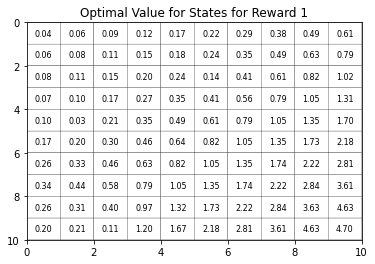

In [0]:
from matplotlib.colors import ListedColormap
values = [0 for _ in range(100)]
w = 0.1
gamma = 0.8
threshold = 0.01
actions = [-10, -1, 10, 1]
reward = []
reward1 = np.array(reward_1).transpose()
for lines in reward1:
    reward += list(lines)

def trans_prob(curr, next, action, w):
    left = curr + actions[0]
    up = curr + actions[1]
    right = curr + actions[2]
    down = curr + actions[3]
    if next == left:
        if action == 0:
            return 1-w+w/4
        else:
            return w/4
    elif next == up:
        if action == 1:
            return 1-w+w/4
        else:
            return w/4
    elif next == right:
        if action == 2:
            return 1-w+w/4
        else:
            return w/4
    elif next == down:
        if action == 3:
            return 1-w+w/4
        else:
            return w/4
    elif next == curr:
        temp = 0
        if left < 0:
            if action == 0:
                temp += (1-w+w/4)
            else:
                temp += w/4
        if right > 99:
            if action == 2:
                temp += (1-w+w/4)
            else:
                temp += w/4
        if up % 10 == 9:
            if action == 1:
                temp += (1-w+w/4)
            else:
                temp += w/4
        if down % 10 == 0:
            if action == 3:
                temp += (1-w+w/4)
            else:
                temp += w/4
        return temp
    else:
        return 0

def computation(curr, action, w, gamma, rewards, values):
    left = curr + actions[0]
    up = curr + actions[1]
    right = curr + actions[2]
    down = curr + actions[3]
    neighbours = [left,up,right,down,curr]
    result = 0
    for neighbour in neighbours:
        if neighbour < 0 or neighbour > 99 or (curr % 10 == 0 and neighbour % 10 == 9) or (curr % 10 == 9 and neighbour % 10 == 0):
            continue
        result += trans_prob(curr, neighbour, action, w) * (rewards[neighbour] + gamma * values[neighbour])
    return result

def optimal_state_value(values, w, gamma, reward, threshold):
    for state in range(100):
        values[state] = 0
    d = float('inf')
 
    while d > threshold:
        d = 0
       
        temp = values[:]
        for state in range(100):
            v = values[state]
            values[state] = max(computation(state, 0, w, gamma, reward, temp),
                                computation(state, 1, w, gamma, reward, temp),
                                computation(state, 2, w, gamma, reward, temp),
                                computation(state, 3, w, gamma, reward, temp))
            d = max(d, abs(v - values[state]))
    return values

opt_values1 = optimal_state_value(values, w, gamma, reward, threshold)
results = np.round(opt_values1, decimals=3).reshape(10, 10).transpose()
plt.pcolor(results,cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.title('Optimal Value for States for Reward 1')
for y in range(results.shape[0]):
  for x in range(results.shape[1]):
    if(results[y, x] >= 10):
      plt.text(x + 0.5, y + 0.5, '%.1f' % results[y, x],horizontalalignment='center',
               verticalalignment='center', fontsize=8)
    else:
      plt.text(x + 0.5, y + 0.5, '%.2f' % results[y, x],horizontalalignment='center',
               verticalalignment='center', fontsize=8)
plt.show()



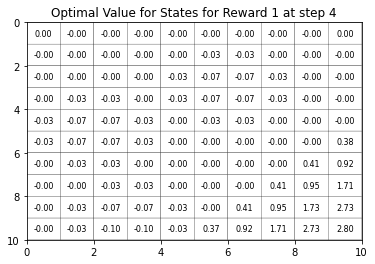

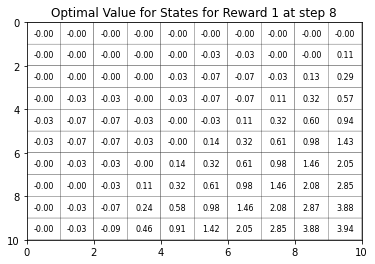

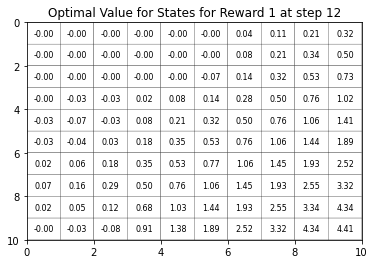

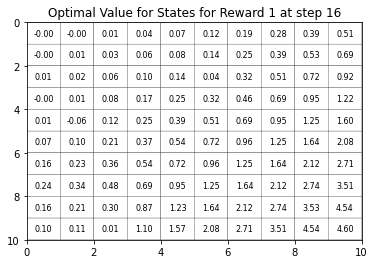

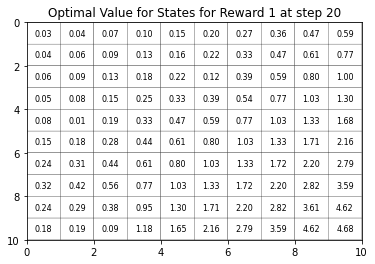

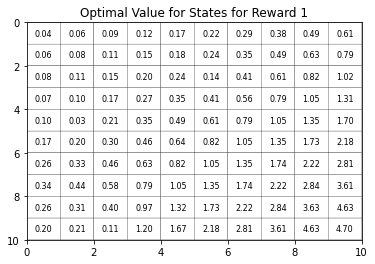

In [0]:
def optimal_state_value_step(values, w, gamma, reward, threshold):
    for state in range(100):
        values[state] = 0
    d = float('inf')
    counter = 0
    while d > threshold:
        d = 0
        counter += 1
        temp = values[:]
        for state in range(100):
            v = values[state]
            values[state] = max(computation(state, 0, w, gamma, reward, temp),
                                computation(state, 1, w, gamma, reward, temp),
                                computation(state, 2, w, gamma, reward, temp),
                                computation(state, 3, w, gamma, reward, temp))
            d = max(d, abs(v - values[state]))
        if counter == 4:
          results = np.round(opt_values1, decimals=3).reshape(10, 10).transpose()
          plt.pcolor(results,cmap=ListedColormap(['white']), edgecolors='black')
          plt.gca().invert_yaxis()
          plt.title('Optimal Value for States for Reward 1 at step 4')
          for y in range(results.shape[0]):
            for x in range(results.shape[1]):
              if(results[y, x] >= 10):
                plt.text(x + 0.5, y + 0.5, '%.1f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
              else:
                plt.text(x + 0.5, y + 0.5, '%.2f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
          plt.show()
        elif counter == 8:
          results = np.round(opt_values1, decimals=3).reshape(10, 10).transpose()
          plt.pcolor(results,cmap=ListedColormap(['white']), edgecolors='black')
          plt.gca().invert_yaxis()
          plt.title('Optimal Value for States for Reward 1 at step 8')
          for y in range(results.shape[0]):
            for x in range(results.shape[1]):
              if(results[y, x] >= 10):
                plt.text(x + 0.5, y + 0.5, '%.1f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
              else:
                plt.text(x + 0.5, y + 0.5, '%.2f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
          plt.show()
        elif counter == 12:
          results = np.round(opt_values1, decimals=3).reshape(10, 10).transpose()
          plt.pcolor(results,cmap=ListedColormap(['white']), edgecolors='black')
          plt.gca().invert_yaxis()
          plt.title('Optimal Value for States for Reward 1 at step 12')
          for y in range(results.shape[0]):
            for x in range(results.shape[1]):
              if(results[y, x] >= 10):
                plt.text(x + 0.5, y + 0.5, '%.1f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
              else:
                plt.text(x + 0.5, y + 0.5, '%.2f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
          plt.show()
        elif counter == 16:
          results = np.round(opt_values1, decimals=3).reshape(10, 10).transpose()
          plt.pcolor(results,cmap=ListedColormap(['white']), edgecolors='black')
          plt.gca().invert_yaxis()
          plt.title('Optimal Value for States for Reward 1 at step 16')
          for y in range(results.shape[0]):
            for x in range(results.shape[1]):
              if(results[y, x] >= 10):
                plt.text(x + 0.5, y + 0.5, '%.1f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
              else:
                plt.text(x + 0.5, y + 0.5, '%.2f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
          plt.show()
        elif counter == 20:
          results = np.round(opt_values1, decimals=3).reshape(10, 10).transpose()
          plt.pcolor(results,cmap=ListedColormap(['white']), edgecolors='black')
          plt.gca().invert_yaxis()
          plt.title('Optimal Value for States for Reward 1 at step 20')
          for y in range(results.shape[0]):
            for x in range(results.shape[1]):
              if(results[y, x] >= 10):
                plt.text(x + 0.5, y + 0.5, '%.1f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
              else:
                plt.text(x + 0.5, y + 0.5, '%.2f' % results[y, x],horizontalalignment='center',
                        verticalalignment='center', fontsize=8)
          plt.show()
    return values

opt_values1 = optimal_state_value_step(values, w, gamma, reward, threshold)
results = np.round(opt_values1, decimals=3).reshape(10, 10).transpose()
plt.pcolor(results,cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.title('Optimal Value for States for Reward 1')
for y in range(results.shape[0]):
  for x in range(results.shape[1]):
    if(results[y, x] >= 10):
      plt.text(x + 0.5, y + 0.5, '%.1f' % results[y, x],horizontalalignment='center',
               verticalalignment='center', fontsize=8)
    else:
      plt.text(x + 0.5, y + 0.5, '%.2f' % results[y, x],horizontalalignment='center',
               verticalalignment='center', fontsize=8)
plt.show()

# Question 3

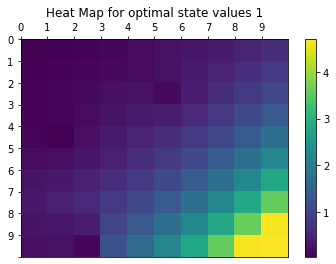

In [0]:
w = 0.1
epsilon = 0.01
gamma = 0.8

maze1 = Maze(w, gamma, reward_1)
maze1.optimal_policy(epsilon)
plot_heat_map(maze1.values, 'Heat Map for optimal state values 1')

# Question 4

# Question 5

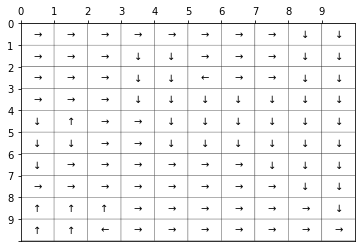

In [0]:
maze1.policy_plot()

# Question 6

In [0]:
reward2 = []
temp = np.array(reward_2).transpose()
for lines in temp:
    reward2 += list(lines)
opt_values_2 = optimal_state_value(values, w, gamma, reward2, threshold)

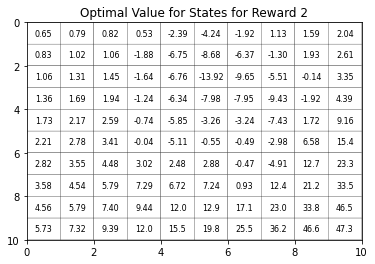

In [0]:
results_2 = np.round(opt_values_2, decimals=3).reshape(10, 10).transpose()
plt.pcolor(results_2,cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.title('Optimal Value for States for Reward 2')
for y in range(results_2.shape[0]):
  for x in range(results_2.shape[1]):
    if(results_2[y, x] >= 10):
      plt.text(x + 0.5, y + 0.5, '%.1f' % results_2[y, x],horizontalalignment='center',
               verticalalignment='center', fontsize=8)
    else:
      plt.text(x + 0.5, y + 0.5, '%.2f' % results_2[y, x],horizontalalignment='center',
               verticalalignment='center', fontsize=8)
plt.show()

# Question 7

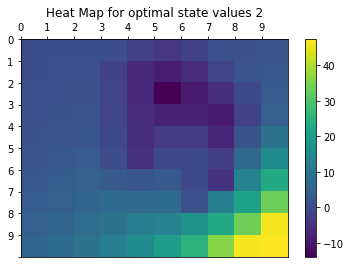

In [0]:
w = 0.1
epsilon = 0.01
gamma = 0.8

maze2 = Maze(w, gamma, reward_2)
maze2.optimal_policy(epsilon)
plot_heat_map(maze2.values, 'Heat Map for optimal state values 2')

# Question 8

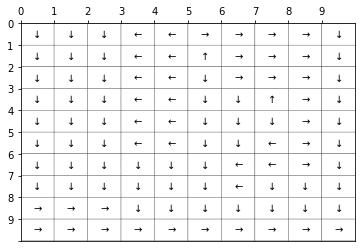

In [0]:
maze2.policy_plot()

# Question 9

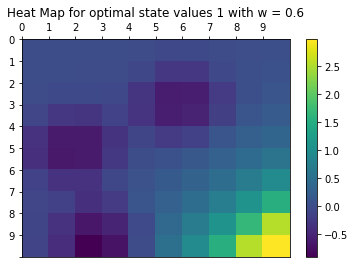

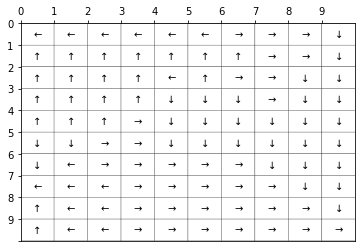

In [0]:
w = 0.6
epsilon = 0.01
gamma = 0.8

maze1 = Maze(w, gamma, reward_1)
maze1.optimal_policy(epsilon)
plot_heat_map(maze1.values,'Heat Map for optimal state values 1 with w = 0.6')
maze1.policy_plot()

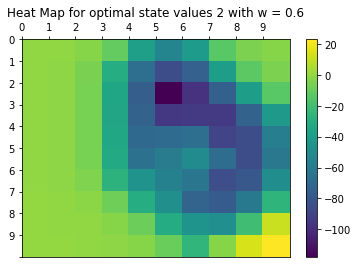

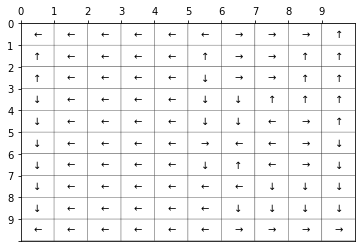

In [0]:
w = 0.6
epsilon = 0.01
gamma = 0.8

maze2 = Maze(w, gamma, reward_2)
maze2.optimal_policy(epsilon)
plot_heat_map(maze2.values,'Heat Map for optimal state values 2 with w = 0.6')
maze2.policy_plot()

# Question 11-17

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.optimize import linprog
from cvxopt import solvers, matrix
import numpy as np
import scipy
solvers.options['show_progress']=False
class IRL(Maze):
    def __init__(self, optimal_policy, gamma, w):
        self.policy = optimal_policy
        self.flattenP = self.policy.transpose().flatten()
        self.size = self.policy.size
        self.shape = self.policy.shape
        self.actions = [-self.shape[0], -1, self.shape[0], 1]
        self.gamma = gamma
        self.w = w

    def derive_rewards(self, R_max, p):
        LP_matrix = np.zeros(((2 * (len(self.actions) - 1) + 4) * self.size, 3 * self.size))
        row_probe = 0
        row_interval = self.size * (len(self.actions) - 1)
        prob_matrix = np.zeros((self.size, self.size))
        for s in range(self.size):
            best_action = self.actions[self.flattenP[s]]
            possible_next = self.possible_next_state(s)
            for next_state in possible_next:
                prob_matrix[s, next_state] = self.trans_prob(s, next_state, best_action)
        coeff_matrix = np.linalg.inv(np.identity(self.size) - self.gamma * prob_matrix)
        for s in range(self.size):
            best_action = self.actions[self.flattenP[s]]
            possible_next = self.possible_next_state(s)
            for a in self.actions:
                if a == best_action:
                    continue
                BA_prob = prob_matrix[s]
                LP_matrix[row_probe, s] = 1
                prob_vector = np.zeros((1, self.size))
                for next_state in possible_next:
                    prob_vector[0, next_state] = self.trans_prob(s, next_state, a)

                tmp_vector = np.dot((prob_vector - BA_prob), coeff_matrix)
                LP_matrix[row_probe, -self.size:] = tmp_vector
                LP_matrix[row_probe + row_interval, -self.size:] = tmp_vector
                row_probe += 1

        row_probe = 2 * row_interval
        LP_matrix[row_probe:row_probe + self.size, self.size:2 * self.size] = -np.identity(self.size)
        LP_matrix[row_probe:row_probe + self.size, 2 * self.size:] = -np.identity(self.size)
        row_probe += self.size
        LP_matrix[row_probe:row_probe + self.size, self.size:2 * self.size] = -np.identity(self.size)
        LP_matrix[row_probe:row_probe + self.size, 2 * self.size:] = np.identity(self.size)
        row_probe += self.size
        LP_matrix[row_probe:row_probe + self.size, 2 * self.size:] = np.identity(self.size)
        row_probe += self.size
        LP_matrix[row_probe:row_probe + self.size, 2 * self.size:] = -np.identity(self.size)

        c_vector = np.zeros((3 * self.size, 1))
        c_vector[:self.size] = -1
        c_vector[self.size:2 * self.size] = p
        b = np.zeros(((2 * (len(self.actions) - 1) + 4) * self.size, 1))
        b[-2 * self.size:] = R_max

        result = solvers.lp(matrix(c_vector), matrix(LP_matrix), matrix(b))
        recovered_reward = result['x'][-self.size:]
        return np.reshape(recovered_reward,self.shape).transpose()

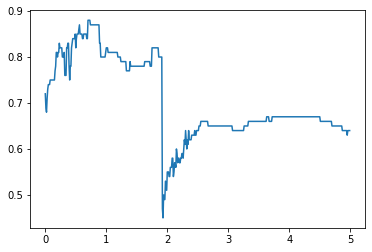

0.7000000000000001
0.88


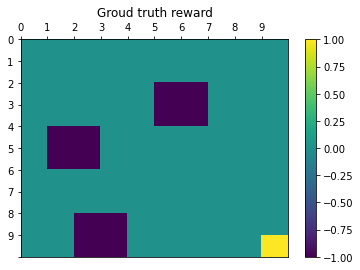

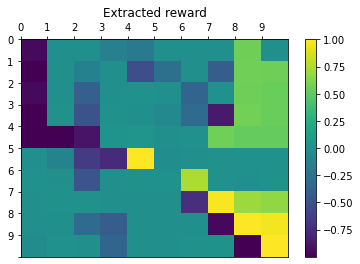

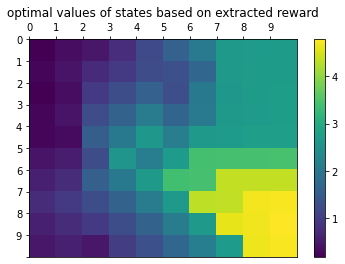

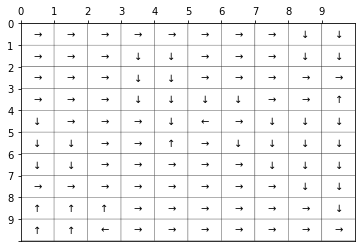

In [0]:
import matplotlib.pyplot as plt
import numpy as np

grid_size = 10
reward1 = np.zeros((grid_size, grid_size))
reward1[2:4, 5:7] = -1
reward1[4:6, 1:3] = -1
reward1[8:10, 2:4] = -1
reward1[9, 9] = 1

reward2 = np.zeros((grid_size, grid_size))
reward2[1:7, 4] = -100
reward2[1, 5:7] = -100
reward2[2:4, 6] = -100
reward2[3, 7:9] = -100
reward2[4:8, 8] = -100
reward2[7, 6:8] = -100
reward2[8, 6] = -100
reward2[9, 9] = 10

w = 0.1
epsilon = 0.01
gamma = 0.8

maze1 = Maze(w, gamma, reward1)
maze1.optimal_policy(epsilon)
maze1.policy_plot()
irl = IRL(maze1.Policy, gamma, w)
penalty_vector = np.linspace(0.0, 5.0, 500,endpoint = False)
accuracy_vector = np.zeros_like(penalty_vector)
for i in range(len(penalty_vector)):
    recovered_R = irl.derive_rewards(np.max(abs(reward1)), penalty_vector[i])
    maze = Maze(w, gamma, recovered_R)
    maze.optimal_policy(epsilon)
    accuracy_vector[i] = np.sum(maze.Policy == maze1.Policy) / (grid_size ** 2)

plt.plot(penalty_vector, accuracy_vector)
plt.show()

optimal_penalty = penalty_vector[np.argmax(accuracy_vector)]
RR = irl.derive_rewards(np.max(abs(reward1)), optimal_penalty)

print(optimal_penalty)
print(max(accuracy_vector))

plot_heat_map(reward1, 'Groud truth reward')
plot_heat_map(RR, 'Extracted reward')

maze = Maze(w, gamma, RR)
maze.optimal_policy(epsilon)
plot_heat_map(maze.values, 'optimal values of states based on extracted reward')
maze.policy_plot()

# Question 18-24

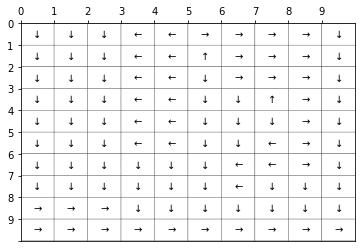

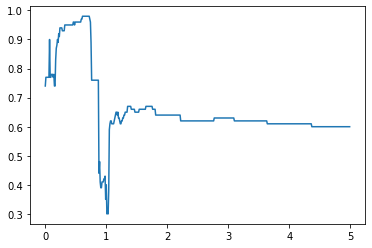

0.61
0.98


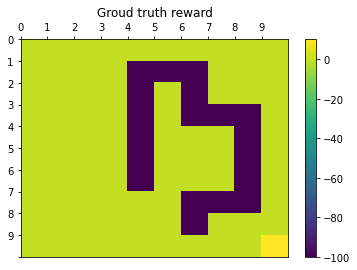

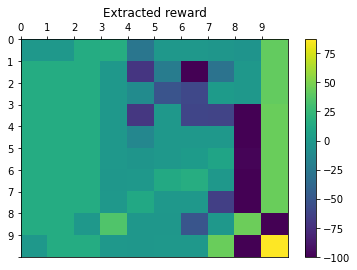

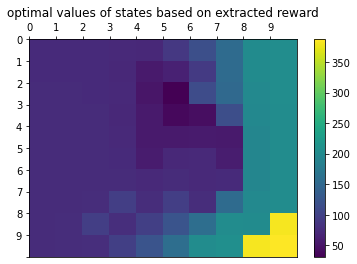

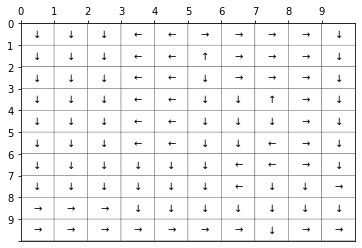

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True False]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True False  True  True]]


In [0]:
epsilon = 0.01
maze2 = Maze(w, gamma, reward2)
maze2.optimal_policy(epsilon)
maze2.policy_plot()
irl = IRL(maze2.Policy, gamma, w)
penalty_vector = np.linspace(0.0, 5.0, 500,endpoint = False)
accuracy_vector = np.zeros_like(penalty_vector)
for i in range(len(penalty_vector)):
    recovered_R = irl.derive_rewards(np.max(abs(reward2)), penalty_vector[i])
    maze = Maze(w, gamma, recovered_R)
    maze.optimal_policy(epsilon)
    accuracy_vector[i] = np.sum(maze.Policy == maze2.Policy) / (grid_size ** 2)

plt.plot(penalty_vector, accuracy_vector)
plt.show()

optimal_penalty = penalty_vector[np.argmax(accuracy_vector)]
RR = irl.derive_rewards(np.max(abs(reward2)), optimal_penalty)


print(optimal_penalty)
print(max(accuracy_vector))

plot_heat_map(reward2, 'Groud truth reward')
plot_heat_map(RR, 'Extracted reward')

maze = Maze(w, gamma, RR)
maze.optimal_policy(epsilon)
plot_heat_map(maze.values, 'optimal values of states based on extracted reward')
maze.policy_plot()

print(maze.Policy == maze2.Policy)

In [0]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from cvxopt import solvers,matrix
from matplotlib.colors import ListedColormap
solvers.options['show_progress']=False

In [0]:
def get_next_state(r, c, executed_action, state_shape):
    # Case where the resulting action is "up"
    if executed_action == 1:
        next_r, next_c = (max(r-1,0), c)
    # Case where the resulting action is "left"
    elif executed_action == 0:
        next_r, next_c = (r, max(c-1,0))
    # Case where the resulting action is "down"
    elif executed_action == 3:
        next_r, next_c = (min(r+1, state_shape[0]-1), c)
    # Case where the resulting action is "right"
    elif executed_action == 2:
        next_r, next_c = (r, min(c+1, state_shape[1]-1))
    return (next_r, next_c)

In [0]:
def get_trans_from_policy(policy, w):
    transition_matrix = np.zeros((len(policy)*len(policy[0]), len(policy)*len(policy[0])))
    for r in range(policy.shape[0]):
        for c in range(policy.shape[1]):
            cur_state_index = r + c*policy.shape[0]
            opt_action = policy[r][c]
            for ex in range(4):
                next_r, next_c = get_next_state(r,c,ex,policy.shape)
                trans_prob = w/4
                if ex == opt_action:
                    trans_prob +=  (1-w)
                next_state_index = next_r + next_c*policy.shape[0]
                transition_matrix[cur_state_index][next_state_index] += trans_prob
    return transition_matrix 

In [0]:
def get_LP_components(opt_policy, r_max, gamma, w):
    
    # Generate the optimal and sub-optimal transition matrices
    P_a1 = get_trans_from_policy(opt_policy, w)
    P_a2 = get_trans_from_policy(np.mod(opt_policy+1,4), w)
    P_a3 = get_trans_from_policy(np.mod(opt_policy+2,4), w)
    P_a4 = get_trans_from_policy(np.mod(opt_policy+3,4), w)
    
    # Short-cuts for common matrices
    N = np.ma.size(opt_policy)
    I_NxN = np.identity(N)
    zero_NxN = np.zeros((N,N))
    
    # Generate D
    D1 = np.concatenate([I_NxN, zero_NxN, -np.dot((P_a1-P_a2), np.linalg.inv(np.identity(P_a1.shape[0])-gamma*P_a1))],axis=1)
    D2 = np.concatenate([I_NxN, zero_NxN, -np.dot((P_a1-P_a3), np.linalg.inv(np.identity(P_a1.shape[0])-gamma*P_a1))],axis=1)
    D3 = np.concatenate([I_NxN, zero_NxN, -np.dot((P_a1-P_a4), np.linalg.inv(np.identity(P_a1.shape[0])-gamma*P_a1))],axis=1)
    D4 = np.concatenate([zero_NxN, zero_NxN, -np.dot((P_a1-P_a2), np.linalg.inv(np.identity(P_a1.shape[0])-gamma*P_a1))],axis=1)
    D5 = np.concatenate([zero_NxN, zero_NxN, -np.dot((P_a1-P_a3), np.linalg.inv(np.identity(P_a1.shape[0])-gamma*P_a1))],axis=1)
    D6 = np.concatenate([zero_NxN, zero_NxN, -np.dot((P_a1-P_a4), np.linalg.inv(np.identity(P_a1.shape[0])-gamma*P_a1))],axis=1)
    D7 = np.concatenate([zero_NxN, -I_NxN, I_NxN],axis=1)
    D8 = np.concatenate([zero_NxN, -I_NxN, -I_NxN],axis=1)
    D9 = np.concatenate([zero_NxN, zero_NxN, I_NxN],axis=1)
    D10 = np.concatenate([zero_NxN, zero_NxN, -I_NxN],axis=1)
    D = np.concatenate([D1,D2,D3,D4,D5,D6,D7,D8,D9,D10],axis=0)
    
    # Generate b
    b = np.concatenate([np.zeros((8*N,)), r_max*np.ones((2*N,))])
    
    return D, b

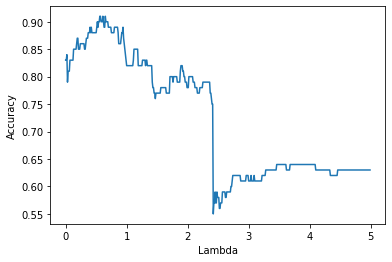

In [0]:
maze2 = Maze(w, gamma, reward2)
maze2.optimal_policy(0.00001)
rmax = 10
N=100

D, b = get_LP_components(maze2.Policy,rmax,gamma,w)

N_lambda = 500
max_lambda = 5
accuracy_vector_2 = np.zeros(N_lambda)

for i,L1 in enumerate(np.linspace(0,max_lambda,N_lambda, endpoint = False)):
    c = np.concatenate([np.ones((N,)), -L1*np.ones((N,)), np.zeros((N,))])
    sol = solvers.lp(matrix(-c),matrix(D),matrix(b))
    R = np.transpose(np.reshape(np.array(sol['x'])[200:],(10,10)))
    maze = Maze(w, gamma, R)
    maze.optimal_policy(epsilon)
    accuracy = np.sum(maze2.Policy == maze.Policy)/100
    accuracy_vector_2[i] = accuracy
plt.plot(np.linspace(0,max_lambda,N_lambda,endpoint = False),accuracy_vector_2)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.show()

# Question 25

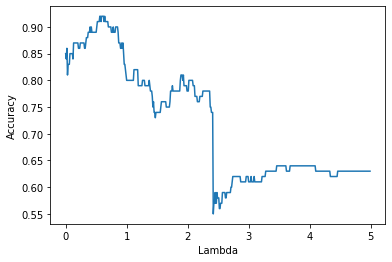

0.92
0.561122244488978


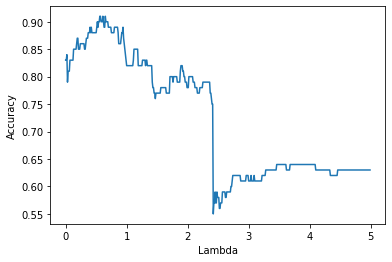

0.91
0.561122244488978


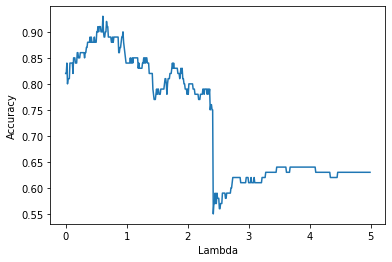

0.93
0.6112224448897795


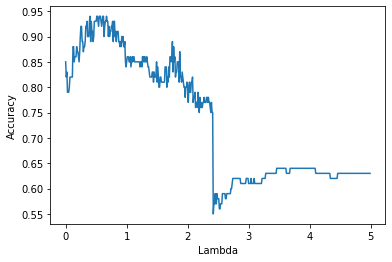

0.94
0.4008016032064128


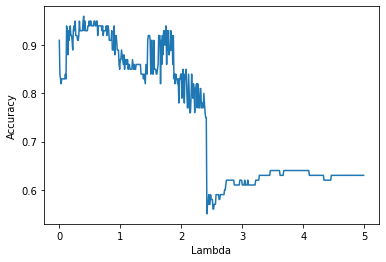

0.96
0.4008016032064128


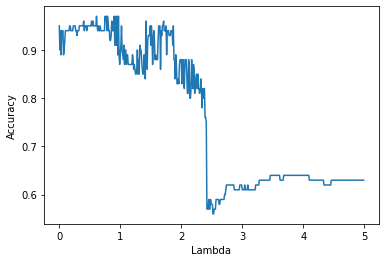

0.97
0.6112224448897795


In [0]:
maze2 = Maze(w, gamma, reward2)
rmax = 10
N=100
for epsilon in [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]:

  maze2.optimal_policy(epsilon)


  D, b = get_LP_components(maze2.Policy,rmax,gamma,w)

  N_lambda = 500
  max_lambda = 5
  accuracy_vector_2 = np.zeros(N_lambda)

  for i,L1 in enumerate(np.linspace(0,max_lambda,N_lambda, endpoint = False)):
    c = np.concatenate([np.ones((N,)), -L1*np.ones((N,)), np.zeros((N,))])
    sol = solvers.lp(matrix(-c),matrix(D),matrix(b))
    R = np.transpose(np.reshape(np.array(sol['x'])[200:],(10,10)))
    maze = Maze(w, gamma, R)
    maze.optimal_policy(epsilon)
    accuracy = np.sum(maze2.Policy == maze.Policy)/100
    accuracy_vector_2[i] = accuracy
  plt.plot(np.linspace(0,max_lambda,N_lambda,endpoint = False),accuracy_vector_2)
  plt.xlabel('Lambda')
  plt.ylabel('Accuracy')
  plt.show()
  print(max(accuracy_vector_2))
  print(penalty_vector[np.argmax(accuracy_vector_2)])